# Karan Kumar 6380812

## Hough Transform to count number of coins in an image

In [865]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

### Reading image

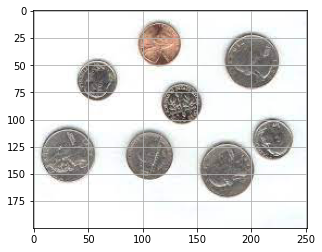

In [866]:
coins = plt.imread('assets/coin_sample1.jpeg')
coins2 = plt.imread('assets/coin_sample2.jpeg')

plt.imshow(coins)
plt.grid()

### Grayscale and blur the image

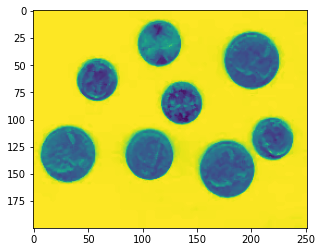

In [867]:
def grayscale_image(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def blur_image(image, blur_value):
    return cv2.medianBlur(image, blur_value)

sample_image_gray_blur = blur_image(grayscale_image(coins), 3)
plt.imshow(sample_image_gray_blur)

### Detect edeges using Canny edge detector

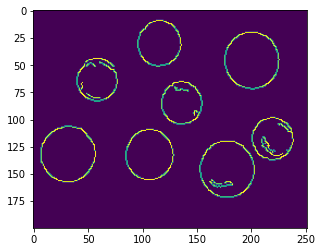

In [868]:
def edge_detect(image, min_val, max_val):
    return cv2.Canny(image, min_val, max_val)

sample_image_canny = edge_detect(sample_image_gray_blur, 130, 400)
plt.imshow(sample_image_canny)

### Using Hough Circle Transform with OpenCV

In [869]:
def hough_circle_opencv(coin_image_gb, dp, min_dist, param1, param2):
    circles = cv2.HoughCircles(coin_image_gb,cv2.HOUGH_GRADIENT,dp,min_dist, param1=param1,  # Gradient value passed to edge detection
        param2=param2)
    return circles

### Let's try it on our sample images

### Image 1:

In [870]:
sample_image_gray_blur = blur_image(grayscale_image(coins), 3)
sample_image_gray_blur_canny = edge_detect(sample_image_gray_blur, 130, 200)
circles_detected = hough_circle_opencv(sample_image_gray_blur_canny, 1, 40, 20, 30)


f"Number of coins detected: {np.size(circles_detected)/3}"

'Number of coins detected: 8.0'

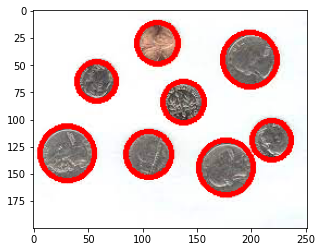

In [871]:
for (x,y,r) in np.round(circles_detected[0, :].astype("int")):
    cv2.circle(coins, (x,y), r, (255,0,0), 4)

plt.imshow(coins)

### Image 2:

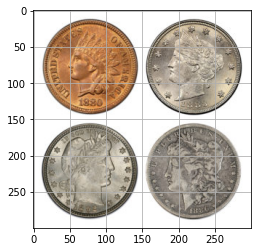

In [872]:
plt.imshow(coins2)
plt.grid()

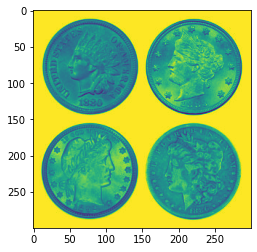

In [873]:
sample_image_gray_blur = blur_image(grayscale_image(coins2), 1)
plt.imshow(sample_image_gray_blur)

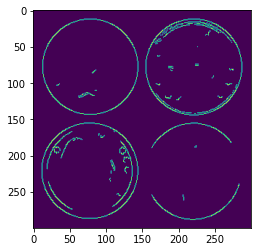

In [874]:
sample_image_gray_blur_canny = edge_detect(sample_image_gray_blur, 400, 600)
plt.imshow(sample_image_gray_blur_canny)

In [875]:
circles_detected = hough_circle_opencv(sample_image_gray_blur_canny, 1, 40, 20, 30)


f"Number of coins detected: {np.size(circles_detected)/3}"

'Number of coins detected: 4.0'

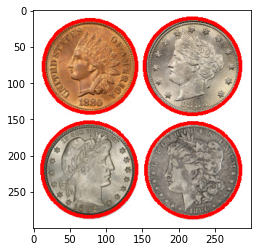

In [876]:
for (x,y,r) in np.round(circles_detected[0, :].astype("int")):
    cv2.circle(coins2, (x,y), r, (255,0,0), 4)

plt.imshow(coins2)